In [36]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
from tabulate import tabulate

***General Functions***

In [37]:
f = lambda x: x**3-x-2

def ea(x_old, x_new):
    return abs((x_new - x_old) / x_new) *100

def printData(root, iteration):
    print('Xr = %0.7f \nNo. of iterations: %d' % (root,iteration))

def getRootAndExecTime(method):
    execution_time = timeit.timeit(lambda: method, number=1)
    print(f'Execution time: {execution_time} seconds')
    return execution_time

def plot_convergence(x,y,title,xlabel,ylabel):
    plt.title(f'Convergence Behavior: {title}')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.text(x[len(x)-1],y[len(y)-1],'%d, %0.7f' % (x[len(x)-1], y[len(y)-1]), verticalalignment='top', horizontalalignment='center')
    plt.plot(x,y,'bo-')
    plt.show()

summary = [['Method','Xr','Execution Time','Iterations']]

def add_to_summary(title,xr,iter,e_time):
    formatted_xr = ('%.8f' % xr)
    # formatted_time = ('%.11f' % e_time)
    summary.append([title,formatted_xr,e_time,iter])

**Simple Fixed Point Iteration**

x0 = 0
Xr = 1.5213794 
No. of iterations: 8
Execution time: 5.000001692678779e-07 seconds


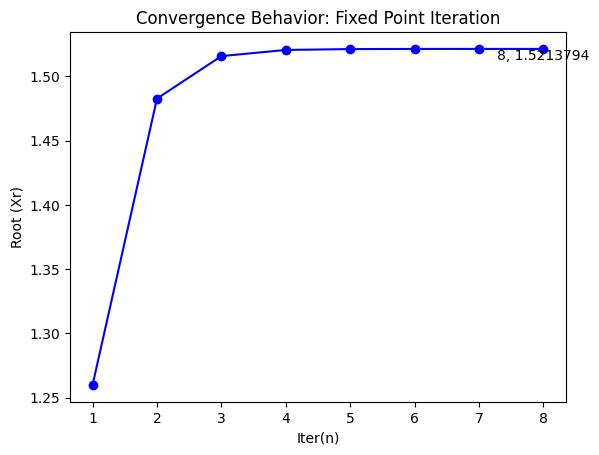

In [38]:
g = lambda x: (x+2)**(1/3)

SF = 5
es = (0.5*10**(2-SF))

x0 = 0
xr_s = []
x_interval = []

def fixed_point_iteration(x0,g,es):
    xr = x0
    iter = 0
    while True:
        _ea = 0
        xr_old = xr
        xr = g(xr_old)
        xr_s.append(xr)
        iter += 1
        x_interval.append(iter)

        if xr!= 0:
            _ea = ea(xr_old,xr)
        if _ea < es:
            break

    printData(xr, iter)


print(f'x0 = {x0}')
execTime = getRootAndExecTime(fixed_point_iteration(x0,g,es))
add_to_summary('Fixed Point Iteration',xr_s[len(xr_s)-1],x_interval[len(x_interval)-1],execTime)
plot_convergence(x_interval,xr_s,"Fixed Point Iteration","Iter(n)","Root (Xr)")

**Newton-Raphson Method**

Xr = 1.5213797 
No. of iterations: 30
Execution time: 5.000001692678779e-07 seconds


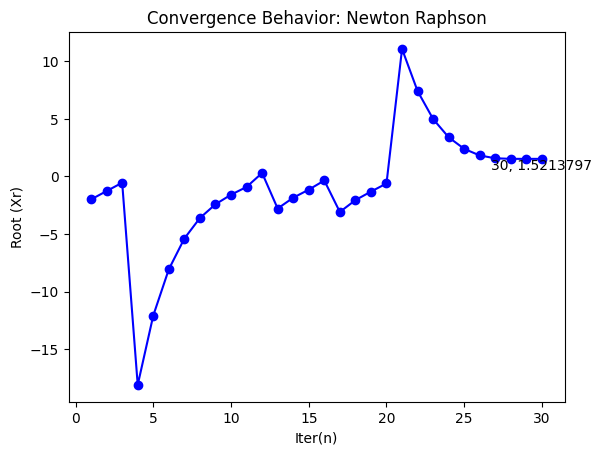

In [39]:
df = lambda x: 3*x**2 - 1

x0 = 0
xr_s = []
x_interval = []

def newton_raphson(f,dfdx, x0):
    x_old = x0
    iter = 0
    while True:
        _ea = 0
        x_new = x_old - (f(x_old) / dfdx(x_old))
        iter += 1
        x_interval.append(iter)
        xr_s.append(x_new)

        if x_new!= 0:
            _ea = ea(x_old,x_new)

        x_old = x_new

        if _ea < es:
            break
    printData(x_new, iter)

execTime = getRootAndExecTime(newton_raphson(f,df,x0))
add_to_summary('Newton-Raphson',xr_s[len(xr_s)-1],x_interval[len(x_interval)-1],execTime)
plot_convergence(x_interval,xr_s,"Newton Raphson","Iter(n)","Root (Xr)")

**Secant Method**

Xr = 1.5213763 
No. of iterations: 5
Execution time: 8.000006346264854e-07 seconds


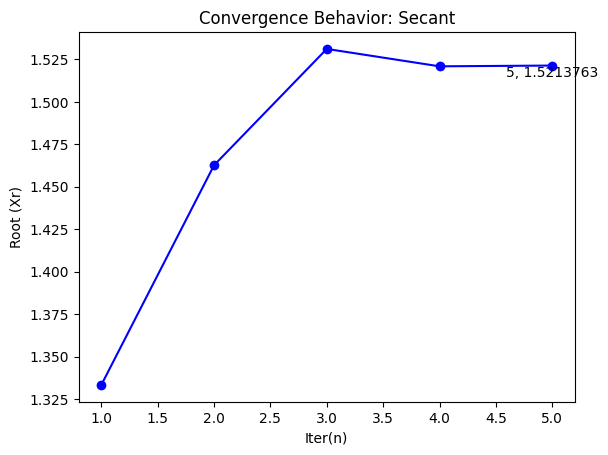

In [40]:
xr_s = []
x_interval = []

def secant(x0,x1,e,N):
    iter = 0
    x2 = 0
    condition = True
    while condition:
        if f(x0) == f(x1):
            print('Divide by zero error!')
            break

        iter += 1
        x2 = x0 - (x1-x0)*f(x0)/( f(x1) - f(x0) )
        x_interval.append(iter)
        xr_s.append(x2)

        x0 = x1
        x1 = x2

        if iter > N:
            print('Not Convergent!')
            break

        condition = abs(f(x2)) > e
    printData(x2, iter)

execTime = getRootAndExecTime(secant(1,2,es,12))
add_to_summary('Secant',xr_s[len(xr_s)-1],x_interval[len(x_interval)-1],execTime)
plot_convergence(x_interval,xr_s,"Secant","Iter(n)","Root (Xr)")

In [41]:
add_to_summary('Bisection',1.5213777815263123,19,8.746490e-04)
print('Testing Summary')
print(tabulate(summary))

Testing Summary
---------------------  ----------  ---------------------  ----------
Method                 Xr          Execution Time         Iterations
Fixed Point Iteration  1.52137936  5.000001692678779e-07  8
Newton-Raphson         1.52137971  5.000001692678779e-07  30
Secant                 1.52137632  8.000006346264854e-07  5
Bisection              1.52137778  0.000874649            19
---------------------  ----------  ---------------------  ----------
